In [1]:
import torch
from model.iternet import Unet

**Initialize random data**

In [2]:
batch_size = 1
image = torch.randn(batch_size, 3, 576, 576)
data = torch.randn(batch_size, 1)

In [3]:
image.shape

torch.Size([1, 3, 576, 576])

**Run the model**

In [4]:
model = Unet(in_channels=3, out_channels=32, kernel_size=(3, 3), do=0.2, num_classes=1).to('cpu')
output = model(image)

In [5]:
output.shape

torch.Size([1, 1, 576, 576])

In [6]:
#from torchsummary import summary
#summary(model, (3, 576, 576), device='cpu')

In [7]:
import numpy as np
a = torch.rand(1)
a

tensor([0.6701])

In [8]:
a.gt(torch.tensor([0.5]))

tensor([True])

In [9]:
if a.gt(torch.tensor([0.5])):
    print('---')

---


In [10]:
from augmentation.transforms import *

**Test RandomFlip**

In [11]:
from torchvision import transforms
img = transforms.ToPILImage()(image[0]).convert("RGB")
RF = RandomFlip()
img_, mask_ = RF(img, img)

**Test RandomRotation**

In [12]:
RR = RandomRotation(degrees=(-180, 180))
img, mask = RR(img, img)

**Test RandomAffine**

In [13]:
RA = RandomAffine(degrees=0, translate=(0.1, 0.2))
img, mask = RA(img, img)

In [14]:
import pandas as pd
from os import listdir
filenames = listdir('data/stare/labels-ah/')

In [15]:
len(filenames)

20

In [16]:
df = pd.DataFrame({'filename': filenames})

In [17]:
df

,filename
0,im0081.ppm
1,im0291.ppm
2,im0239.ppm
3,im0319.ppm
4,im0001.ppm
5,im0002.ppm
6,im0005.ppm
7,im0044.ppm
8,im0003.ppm
9,im0324.ppm


In [20]:
train = df[:12]
val = df[12:]
train.to_csv('data/stare/train.csv', index=None)
val.to_csv('data/stare/val.csv', index=None)

In [1]:
import pandas as pd
train = pd.read_csv('data/stare/train.csv')
train['filename'].tolist()

['im0081.ppm',
 'im0291.ppm',
 'im0239.ppm',
 'im0319.ppm',
 'im0001.ppm',
 'im0002.ppm',
 'im0005.ppm',
 'im0044.ppm',
 'im0003.ppm',
 'im0324.ppm',
 'im0082.ppm',
 'im0255.ppm']

In [1]:
from dataset.dataset_retinal import DatasetRetinal
from augmentation.transforms import TransformImgMask, TransformImg
csv_file = 'data/stare/train.csv'
image_dir = 'data/stare/stare-images/' 
mask_dir = 'data/stare/labels-ah/'
DR = DatasetRetinal(csv_file, image_dir, mask_dir, transform_img_mask=TransformImgMask(size=(224, 224)), transform_img=TransformImg())

In [2]:
img, mask = DR[0]

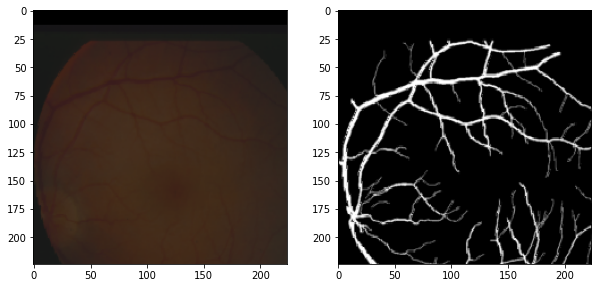

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(img)
ax[1].imshow(mask)

In [4]:
DR = DatasetRetinal(csv_file, image_dir, mask_dir, transform_img_mask=TransformImgMask(size=(224, 224), to_tensor=True), transform_img=TransformImg())

In [5]:
img, mask = DR[0]

In [6]:
import torch
from model.iternet import Unet

In [9]:
model = Unet(in_channels=3, out_channels=32, kernel_size=(3, 3), do=0.2, num_classes=1).to('cpu')
img = img.unsqueeze(0)
output = model(img)

In [10]:
output.shape

torch.Size([1, 1, 224, 224])